**Lista pytań:**
1. Czy sieć som ma osiągnąć to samo co FFNN czy inny problem?
2. Ile ma być epok w trenowaniu seci? Co zrobić jeśli czas trenowania seci wyjdzie w godzinach?

In [4]:
# Import required libraries 
import keras #library for neural network
from keras.utils import np_utils
from keras.models import Sequential 
from keras.layers import Dense,Activation,Dropout
import pandas as pd #loading data in table form  
import seaborn as sns #visualisation 
import matplotlib.pyplot as plt #visualisation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import normalize #machine learning algorithm library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

# Library settings
pd.set_option('display.max_columns', 60)

# **A. Opis zbiorów danych.**

**Covertype Data Set**

Typ atrybutów: Kategoryczny, Integer. <br>
Liczba atrybutów: 54 <br>
Zgubione wartości: 0 <br>
Rodzaj danych: Dyskretne <br>

Zbiór danych służy do przewidywania typu pokrycia leśnego na podstawie następujących atrybutów:
*   Wysokość
*   Wygląd/Aspekt
*   Nachylenie
*   Pozioma odległość od wody
*   Pionowa odległość od wody
*   Pozioma odległość od jezdni
*   Zacienienie o 9:00
*   Zacienienie o 12:00
*   Zacienienie o 15:00
*   Pozioma odległość do punktów zapłonu
*   Dziekie tereny (4 binarne kolumny)
*   Typy ziemii (40 binarnych kolumn)
*   7 typów pokrycia leśnego

Dane są w postaci surowej, nie były skalowane.
Wszystkie dane zostały uzyskane od instytucji znajdujących się w USA i dotyczą czterech obszarów dzikiej przyrody znajdujących się w Roosevelt National Forest w północnym Kolorado. Obszary te zostały wybrane ze względu na to, że nie znajdziemy tam dużej ingerencji człowieka, zatem wygląd tych terenów i typy pokrycia leśnego są wynikiem przemian naturalnych.

Najlepsze i najbardziej typowe dla całego zbiory danych są obszary Rawah oraz Comanche Peak, ponieważ posiadają wiele gatunków drzew i lepszy zakres wartości zmiennych predykcyjnych takich jak np. wyokość. Skłąd gatunkowy pozostałych dwóch obszarów jest nieco bardziej ubogi.

<br>
<br>

**Credit Approval Data Set**

Typ atrybutów: Kategoryczny, Continuous, Integer. <br>
Liczba atrybutów: 15 <br>
Liczba instancji: 690 <br>
Zgubione wartości: występują <br>
Rodzaj danych: Mieszane <br>

Zbiór danych służy do rozpatrywania wniosków o karty kredytowe na podstawie następujących atrybutów:

* A1: b, a. 
* A2: continuous. 
* A3: continuous. 
* A4: u, y, l, t. 
* A5: g, p, gg. 
* A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff. 
* A7: v, h, bb, j, n, z, dd, ff, o. 
* A8: continuous. 
* A9: t, f. 
* A10: t, f. 
* A11: continuous. 
* A12: t, f. 
* A13: g, p, s. 
* A14: continuous. 
* A15: continuous. 
* A16: +,- (class attribute)

Nazwy i wartości wszystkich atrybutów zostały zmienione na nic nieznaczące symbole w celu ochrony poufności danych. W zbiorze danych znajdują się atrybuty kategoryczne, ciągłe oraz typu całkowitego o dużych i małych wartościach. Zbiór danych powstał w calach klasyfikacyjnych i posiada 15 atrybutów z 690 instancjami w którym występują brakujące dane.


# **Wczytywanie zbiorów danych**

In [ ]:
#  Load dataset 1
print("Dataset 1 - forest covertype:\n")
covtype_colnames = ['Elevation', 'Aspect', 'Slope', 'Dist_to_water_hor', 'Dist_to_water_ver', 'Hillshade_9am', 'Hillshade_Noon',
                    'Hillshade_3pm', 'Dist_to_fire', ] + [f'Wilderness_{i}' for i in range(4)] + [f'Soil_{i}' for i in range(40)] + ['Cover_Type']
covtype_dataset = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.data.gz",
                              compression='gzip', header=None, names=covtype_colnames)
covtype_dataset.head()

Dataset 1 - forest covertype:



,Elevation,Aspect,Slope,Dist_to_water_hor,Dist_to_water_ver,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Dist_to_fire,Wilderness_0,Wilderness_1,Wilderness_2,Wilderness_3,Soil_0,Soil_1,Soil_2,Soil_3,Soil_4,Soil_5,Soil_6,Soil_7,Soil_8,Soil_9,Soil_10,Soil_11,Soil_12,Soil_13,Soil_14,Soil_15,Soil_16,Soil_17,Soil_18,Soil_19,Soil_20,Soil_21,Soil_22,Soil_23,Soil_24,Soil_25,Soil_26,Soil_27,Soil_28,Soil_29,Soil_30,Soil_31,Soil_32,Soil_33,Soil_34,Soil_35,Soil_36,Soil_37,Soil_38,Soil_39,Cover_Type
2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [5]:
#  Load dataset 2
credit_colnames = [f'A{i}' for i in range(1,17)]
credit_dataset = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data",header=None, names=credit_colnames)
print("Dataset 2 - credit screening:\n")
credit_dataset.head()

Dataset 2 - credit screening:



,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


# **Wizualizacja danych**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


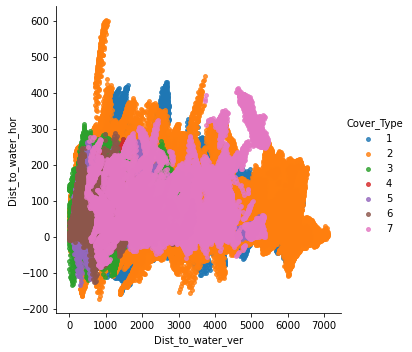

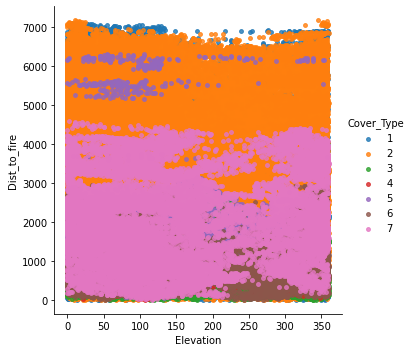

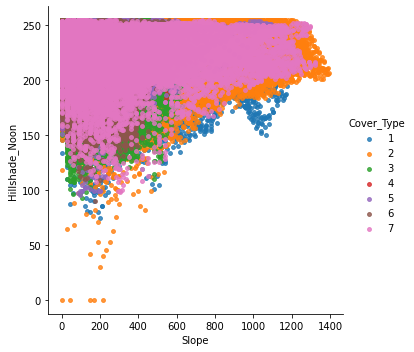

In [ ]:
sns.lmplot('Dist_to_water_ver', 'Dist_to_water_hor',
           data=covtype_dataset,
           fit_reg=False,
           hue="Cover_Type",
           scatter_kws={"marker": "D",
                        "s": 15})

sns.lmplot('Elevation', 'Dist_to_fire',
           data=covtype_dataset,
           fit_reg=False,
           hue="Cover_Type",
           scatter_kws={"marker": "D",
                        "s": 15})

sns.lmplot('Slope', 'Hillshade_Noon',
           data=covtype_dataset,
           fit_reg=False,
           hue="Cover_Type",
           scatter_kws={"marker": "D",
                        "s": 15})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

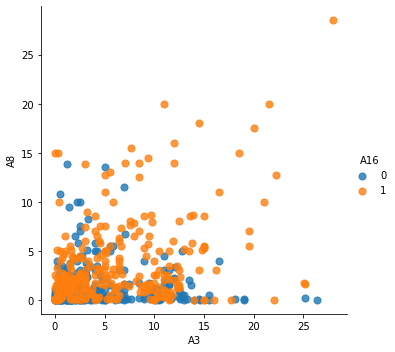

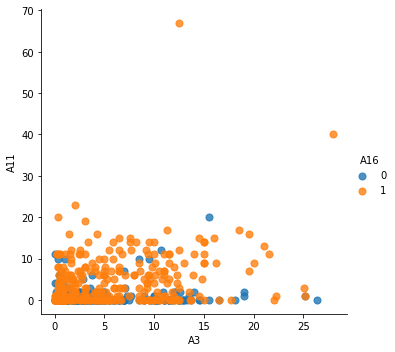

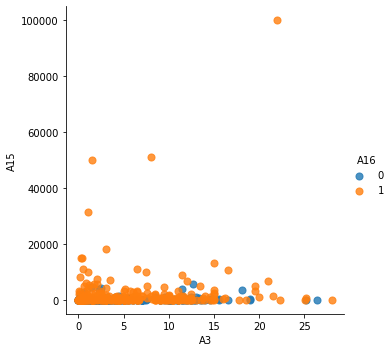

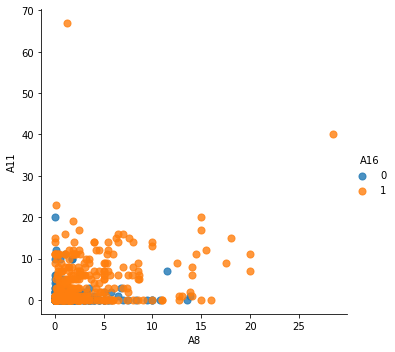

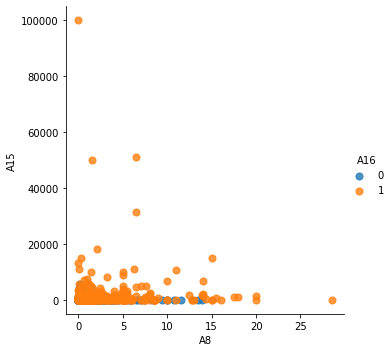

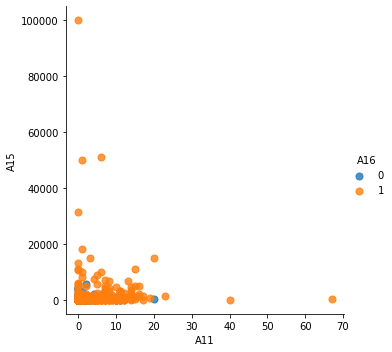

In [ ]:
A = ['A3', 'A8', 'A11', 'A15']
for i in range(len(A)):
    for j in range(len(A)):
        if i >= j:
            pass
        else:
            sns.lmplot(A[i], A[j],
                    data=credit_dataset,
                    fit_reg=False,
                    hue="A16",
                    scatter_kws={"marker": "D",
                                    "s": 50})

# **B. Przygotowanie danych.**

Przygotowanie danych dotyczące zbioru danych covtype. Podział na zbiór treningowy i zbiór testowy.

In [ ]:
# replace 7 with 0 to transform covtypes from 1-7 to 0-6
covtype_dataset.loc[covtype_dataset["Cover_Type"] == 7, "Cover_Type"] = 0

# split into data and labels
covtype_X = covtype_dataset.iloc[:, 0:-1].values
covtype_y = covtype_dataset.iloc[:, -1].values
covtype_X = normalize(covtype_X, axis=0)

# split into test set and training set
covtype_X_train, covtype_X_test, covtype_y_train, covtype_y_test = train_test_split(covtype_X, covtype_y, test_size=0.20, random_state=31)

# transform labels to OHE
covtype_y_train = np_utils.to_categorical(covtype_y_train, num_classes=7)
covtype_y_test = np_utils.to_categorical(covtype_y_test, num_classes=7)

Przygotowanie danych dotyczące zbioru danych credit approval. ??????Podział na zbiór treningowy i zbiór testowy?????????.

In [6]:
# remove missing values
credit_dataset = credit_dataset.replace('?', np.NaN)
credit_dataset = credit_dataset.dropna()

# divide attributes to numerical and categorical
credit_dataset_num = ['A2', 'A3', 'A8', 'A11', 'A14', 'A15']
credit_dataset_cat = ['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13', 'A16']

# replace two-value categorical attributes to 0 and 1, adding them to numerical attributes
for i in credit_dataset_cat:
    if len(credit_dataset[i].unique()) == 2:
        credit_dataset[i] = credit_dataset[i].replace(['a', 't', '+'], 1)
        credit_dataset[i] = credit_dataset[i].replace(['b', 'f', '-'], 0)
        credit_dataset[i] = credit_dataset[i].astype('int')
        credit_dataset_num.append(i)

# remove duplicated attributes
for i in credit_dataset_num:
    if i in credit_dataset_cat:
        credit_dataset_cat.remove(i)

# changing type of numerical attributes to float
for i in credit_dataset_num:
    if credit_dataset[i].dtypes == object:
        credit_dataset[i] = credit_dataset[i].astype('float')

# transform labels to OHE
for i in credit_dataset.columns:
    if credit_dataset[i].dtypes == object:
        y = pd.get_dummies(credit_dataset[i], prefix=i)
        credit_dataset = credit_dataset.drop(columns=i)
        credit_dataset = pd.concat([credit_dataset, y], axis=1)

# putting attribute that we want to predict to last column
cols = credit_dataset.columns.to_list()
cols.remove('A16')
cols.append('A16')

credit_dataset = credit_dataset[cols]

# split into data and labels
credit_X = credit_dataset.iloc[:, 0:-1].values
credit_y = credit_dataset.iloc[:, -1].values
credit_X = normalize(credit_X, axis=0)

# split into test set and training set
credit_X_train, credit_X_test, credit_y_train, credit_y_test = train_test_split(credit_X, credit_y, test_size=0.20, random_state=31)

# transform boolean to 2-column to OHE
credit_y_train = np_utils.to_categorical(credit_y_train, num_classes=2)
credit_y_test = np_utils.to_categorical(credit_y_test, num_classes=2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

# **C. Struktura sieci**

In [ ]:
# sieć dla covtype

# create NN
covtype_NN_model = Sequential()
covtype_NN_model.add(Dense(1000, input_dim=53, activation='relu'))  # the input layer
covtype_NN_model.add(Dense(100, activation='relu'))  # the first hidden layer
covtype_NN_model.add(Dense(500, activation='relu'))  # the second hidden layer
covtype_NN_model.add(Dropout(0.2))  # Protects against overfitting
covtype_NN_model.add(Dense(7, activation='softmax'))  # the output layer
covtype_NN_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  # compile model

# train NN
covtype_NN_model.fit(covtype_X_train, covtype_y_train, validation_data=(covtype_X_test, covtype_y_test), batch_size=20, epochs=10, verbose=1)

# predict values from test set, measure accuracity
prediction = covtype_NN_model.predict(covtype_X_test)
length = len(prediction)
y_label = np.argmax(covtype_y_test, axis=1)
predict_label = np.argmax(prediction, axis=1)
# how times it matched/ how many test cases
accuracy = np.sum(y_label == predict_label)/length * 100
print("Accuracy of the neural network:", accuracy)


Epoch 1/10
23241/23241 [==============================] - 117s 5ms/step - loss: 0.8079 - accuracy: 0.6236 - val_loss: 0.7665 - val_accuracy: 0.6464
Epoch 2/10
23241/23241 [==============================] - 116s 5ms/step - loss: 0.7542 - accuracy: 0.6511 - val_loss: 0.7408 - val_accuracy: 0.6593
Epoch 3/10
23241/23241 [==============================] - 131s 6ms/step - loss: 0.7278 - accuracy: 0.6624 - val_loss: 0.7195 - val_accuracy: 0.6620
Epoch 4/10
23241/23241 [==============================] - 114s 5ms/step - loss: 0.7033 - accuracy: 0.6748 - val_loss: 0.6874 - val_accuracy: 0.6819
Epoch 5/10
23241/23241 [==============================] - 113s 5ms/step - loss: 0.6844 - accuracy: 0.6853 - val_loss: 0.6761 - val_accuracy: 0.6899
Epoch 6/10
23241/23241 [==============================] - 113s 5ms/step - loss: 0.6667 - accuracy: 0.6941 - val_loss: 0.6544 - val_accuracy: 0.6991
Epoch 7/10
23241/23241 [==============================] - 109s 5ms/step - loss: 0.6494 - accuracy: 0.7020 - val_

In [8]:
# sieć dla credit

# create NN
credit_NN_model = Sequential()
credit_NN_model.add(Dense(1000, input_dim=42, activation='relu'))  # the input layer
credit_NN_model.add(Dense(100, activation='relu'))  # the first hidden layer
credit_NN_model.add(Dropout(0.2))  # Protects against overfitting
credit_NN_model.add(Dense(2, activation='softmax'))  # the output layer
credit_NN_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  # compile model

# train NN
credit_NN_model.fit(credit_X_train, credit_y_train, validation_data=(credit_X_test, credit_y_test), batch_size=20, epochs=10, verbose=1)

# predict values from test set, measure accuracity
prediction = credit_NN_model.predict(credit_X_test)
length = len(prediction)
y_label = np.argmax(credit_y_test, axis=1)
predict_label = np.argmax(prediction, axis=1)
# how times it matched/ how many test cases
accuracy = np.sum(y_label == predict_label)/length * 100
print("Accuracy of the neural network:", accuracy)


Epoch 1/10
27/27 [==============================] - 1s 12ms/step - loss: 0.6646 - accuracy: 0.6533 - val_loss: 0.6067 - val_accuracy: 0.7481
Epoch 2/10
27/27 [==============================] - 0s 6ms/step - loss: 0.4808 - accuracy: 0.8333 - val_loss: 0.4697 - val_accuracy: 0.7786
Epoch 3/10
27/27 [==============================] - 0s 6ms/step - loss: 0.3507 - accuracy: 0.8621 - val_loss: 0.4596 - val_accuracy: 0.8244
Epoch 4/10
27/27 [==============================] - 0s 6ms/step - loss: 0.3817 - accuracy: 0.8257 - val_loss: 0.4270 - val_accuracy: 0.8321
Epoch 5/10
27/27 [==============================] - 0s 6ms/step - loss: 0.3254 - accuracy: 0.8582 - val_loss: 0.3987 - val_accuracy: 0.8244
Epoch 6/10
27/27 [==============================] - 0s 7ms/step - loss: 0.3133 - accuracy: 0.8544 - val_loss: 0.3979 - val_accuracy: 0.8397
Epoch 7/10
27/27 [==============================] - 0s 6ms/step - loss: 0.3214 - accuracy: 0.8793 - val_loss: 0.3895 - val_accuracy: 0.8550
Epoch 8/10
27/27 [=